# 제 5회 빅콘테스 챌린지리그

- 문제 : 보험, 통신, 신용평가사 (개인정보 비식별)결합데이터를 활용한 대출상환 예측 알고리즘 개발
- 제공데이터 및 내용 : 개인정보 비식별화 한 SK텔레콤 데이터등 , 개인정보 비식별화 한 SCI평가정보 및 한화생명 데이터 등
- 참가대상 : 대학생 이상 일반인포함 
- http://contest.kbig.kr/sub/sub_question.php

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

# Data

![data](https://files.slack.com/files-tmb/T5AP56SQ3-F6KH2CRUG-10cc1c9afd/_______________________________2017-08-09______________9.10.59_1024.png)

![data](https://files.slack.com/files-tmb/T5AP56SQ3-F6KH2DK6U-4852329394/_______________________________2017-08-09______________9.11.38_1024.png)

![data컬럼설명](https://files.slack.com/files-tmb/T5AP56SQ3-F6L6VB5LJ-5e28475264/_______________________________2017-08-09______________9.11.58_1024.png)

In [3]:
train = pd.read_csv('Data_set.csv', encoding='cp949')

In [35]:
train.tail()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,CBPT_MBSP_YN,MOBL_FATY_PRC,TEL_CNTT_QTR,NUM_DAY_SUSP,CRMM_OVDU_AMT,TLFE_UNPD_CNT,LT1Y_MXOD_AMT,PAYM_METD,LINE_STUS,MOBL_PRIN
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,N,0,20111,0,20000,0,0,R,U,0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,Y,900000,20134,0,0,0,0,K,U,180000
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,N,0,20141,0,0,0,0,O,U,0
100231,102251,0,0,0,1,1,57001,0,0,0,...,N,900000,20103,0,0,0,0,O,U,540000
100232,102252,0,1,0,0,0,18001,18001,18001,0,...,N,400000,20151,0,0,0,60000,K,U,180000


In [5]:
train.shape

(100233, 69)

test = pd.read_csv('Test_set.csv', encoding='cp949')

test.head()

test.shape

In [25]:
grouped = train['TARGET'].value_counts()
grouped

0    95946
1     4287
Name: TARGET, dtype: int64

### 1. train 데이터로 주어진 고객 수 :100233명
   * 대출연체 여부
        - 0 (미발생): 95946명
        - 1 (발생) : 4287명

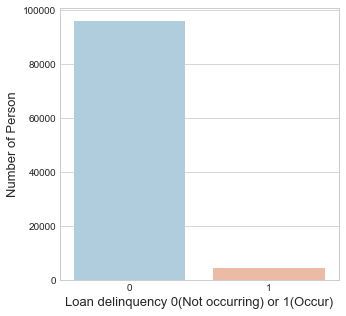

In [34]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(grouped.index, grouped.values, palette='RdBu_r')
plt.ylabel('Number of Person', fontsize=13)
plt.xlabel('Loan delinquency 0(Not occurring) or 1(Occur)', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()